In [282]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [283]:
premier= pd.read_csv('D:/Download/PL1920.csv') #Imported the data set
premier=premier.iloc[:, : 10] #sliced to retrieved desired informations
print premier.describe() #summarising the dataset

             FTHG        FTAG        HTHG        HTAG
count  160.000000  160.000000  160.000000  160.000000
mean     1.568750    1.362500    0.718750    0.631250
std      1.226653    1.300641    0.946173    0.828895
min      0.000000    0.000000    0.000000    0.000000
25%      1.000000    0.000000    0.000000    0.000000
50%      1.000000    1.000000    0.000000    0.000000
75%      2.000000    2.000000    1.000000    1.000000
max      8.000000    9.000000    5.000000    5.000000


In [285]:
premier['HGD']=np.absolute(premier['FTHG']-premier['FTAG']) #adding column for goal difference of the away team
premier['AGD']=np.absolute(premier['FTAG']-premier['FTHG']) #adding column for goal difference of the away team
#Replacing values with number for the model that will be built later
premier['Cod']=premier['FTR'].replace(['A','H','D'], [0,2,1]) # 0 for the away team winning,2 for the home team winning and 1 for a draw


In [268]:
#Retrieving all the win,loss and draws of each premier league team's (both home and away)
count=0
#l
#w=[] # number of wins
#dr=[]#  number of draws
win=[] #  winning team
loss=[] # lossing team
drawa=[] # drawing home team
drawh=[] #drawing away team

htm=list(premier.HomeTeam)
atm=list(premier.AwayTeam)
fth=list(premier.FTHG)
fta=list(premier.FTAG)
for a,b,c,d in zip(htm,atm,fth,fta):
    if c>d:
        win.append(a)
        loss.append(b)
    elif d > c:
        win.append(b)
        loss.append(a)
    else:
        drawh.append(a)
        drawa.append(b)
   
    
      


In [269]:
#Used Counter to calculate win,loss and draw for each team
pwin=pd.DataFrame.from_dict(Counter(win), orient='index').reset_index()
pwin.columns=(['Team','Wins'])
plos=pd.DataFrame.from_dict(Counter(loss), orient='index').reset_index()
plos.columns=(['Team','Loss'])
pdr=pd.DataFrame.from_dict(Counter(Counter(drawa)+Counter(drawh)), orient='index').reset_index()
pdr.columns=(['Team','Draw'])
#print pwin
#print plos
#print pdr

In [270]:
#Calculating the goal difference and goal scored for each team
teams=set(htm)

gs=[]
gd=[]
for x in teams:
    gs.append(premier[premier['HomeTeam']==x]['FTHG'].sum()+premier[premier['AwayTeam']==x]['FTAG'].sum())
    gd.append(premier[premier['HomeTeam']==x]['HGD'].sum()+premier[premier['AwayTeam']==x]['AGD'].sum())

goals=pd.DataFrame(list(zip(teams,gs,gd)))
goals.columns=(['Team','GS','GD'])
print goals


                Team  GS  GD
0        Southampton  18 -17
1           Man City  44  25
2          Liverpool  40  26
3            Norwich  17 -17
4           West Ham  18 -10
5        Aston Villa  23  -5
6          Leicester  39  29
7            Burnley  21  -8
8            Arsenal  24   0
9        Bournemouth  18  -6
10    Crystal Palace  14  -4
11           Watford   9 -21
12  Sheffield United  19   3
13         Newcastle  17  -6
14           Everton  19  -9
15            Wolves  23   4
16        Man United  25   6
17           Chelsea  31   7
18         Tottenham  30   7
19          Brighton  20  -4


In [271]:
#Creating the current premier league table (11/12/19)
prem1=pd.merge(pwin,plos,on='Team',how='outer') # outer join because liverpoolhave not lost a game this season
prem1=prem1.fillna(0)
fprem=pd.merge(prem1,pdr, on='Team')
fprem['Total_Points']=fprem['Wins']*3+fprem['Draw']*1
fprem['GP']=fprem['Wins']+fprem['Loss']+fprem['Draw']
fprem=fprem.sort_values(by=['Total_Points'],ascending=False) #current prem table 
fprem=fprem.merge(goals, on='Team')# Merging goal scored and goal difference table
fprem['Position']=range(1,21) # adding position column
fprem=fprem[['Position','Team','GP','Wins','Loss','Draw','GS','GD','Total_Points']]
print display(fprem) # current prem table

,Position,Team,GP,Wins,Loss,Draw,GS,GD,Total_Points
0,1,Liverpool,16.0,15,0.0,1,40,26,46
1,2,Leicester,16.0,12,2.0,2,39,29,38
2,3,Man City,16.0,10,4.0,2,44,25,32
3,4,Chelsea,16.0,9,5.0,2,31,7,29
4,5,Man United,16.0,6,4.0,6,25,6,24
5,6,Wolves,16.0,5,2.0,9,23,4,24
6,7,Tottenham,16.0,6,5.0,5,30,7,23
7,8,Crystal Palace,16.0,6,6.0,4,14,-4,22
8,9,Sheffield United,16.0,5,4.0,7,19,3,22
9,10,Arsenal,16.0,5,4.0,7,24,0,22


None


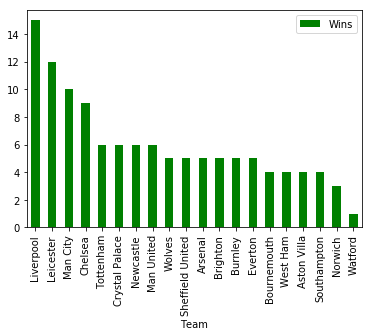

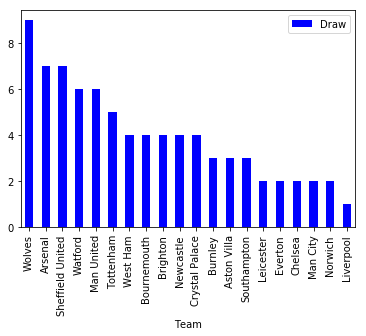

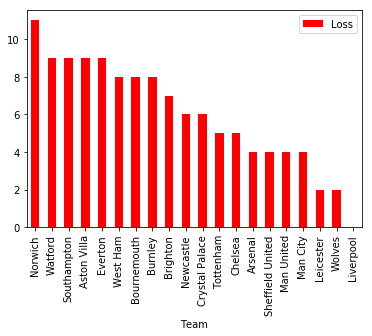

In [253]:
#Graph of wins,loss and draw
fpremw=fprem.sort_values('Wins',ascending=False)
fpremw.plot(kind='bar',x='Team',y='Wins',color='green')
fpremd=fprem.sort_values('Draw',ascending=False)
fpremd.plot(kind='bar',x='Team',y='Draw',color='blue')
fpreml=fprem.sort_values('Loss',ascending=False)
fpreml.plot(kind='bar',x='Team',y='Loss',color='red')

In [290]:
#Loading the historical fixture dataset to help build the model
histprem=pd.read_csv('D:/Download/Historical_EPL_Set.csv')

#Removing results that don't contain at least 1 (home or away) teams that arent currently in the premier league
cprem=list(fprem['Team'])
hthome = histprem[histprem['HomeTeam'].isin(cprem)]
htaway = histprem[histprem['AwayTeam'].isin(cprem)]
hteams = pd.concat((hthome,htaway))
hteams=hteams.drop_duplicates() #Removing duplicates

#Replacing values with number for the model that will be built later
hteams['Cod']=hteams['FTR'].replace(['A','H','D'], [0,2,1])# 0 for the away team winning,2 for the home team winning and 1 for a draw
hteams=hteams.drop(columns=['Div','Date','FTHG','FTAG' ,'HTHG','HTAG','HTR','Season','FTR']) #dropping unessecary columns

In [289]:
#Removing results that don't contain home and away teams that arent currently in the premier league
teams=set(htm)
hteams1 = hteams[hteams['HomeTeam'].isin(teams)]
hteams2= hteams1[hteams1['AwayTeam'].isin(teams)]

print hteams2

              HomeTeam          AwayTeam  Cod
5            Newcastle         Tottenham    0
8          Southampton           Everton    0
10             Norwich        Man United    0
11           Tottenham           Arsenal    0
12             Everton          Man City    2
18          Man United  Sheffield United    2
24             Everton  Sheffield United    2
27          Man United         Newcastle    1
30           Tottenham          Man City    2
33         Aston Villa        Man United    0
39           Liverpool         Tottenham    0
40           Newcastle           Everton    2
45             Arsenal           Everton    2
46         Aston Villa         Tottenham    2
52         Southampton        Man United    0
56             Everton       Aston Villa    0
61          Man United          West Ham    2
65           Tottenham           Chelsea    1
68             Chelsea        Man United    2
72    Sheffield United         Tottenham    1
79             Everton         Liv

In [288]:
#Number of Home,away and draw from the historical dataset)
print 'Number of Away Team:',len(hteams2[hteams2['Cod']==0])
print 'Number of Draw:',len(hteams2[hteams2['Cod']==1])
print 'Number of Home Team:',len(hteams2[hteams2['Cod']==2])

Number of Away Team: 932
Number of Draw: 889
Number of Home Team: 1591


In [256]:
#Building our model
final1 = pd.get_dummies(hteams2, prefix=['HomeTeam','AwayTeam'], columns=['HomeTeam','AwayTeam'])

# Separate X and y sets
X1 = final1.drop(['Cod'], axis=1)
y1 = final1["Cod"]
y1 = y1.astype('int')

# Separate train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

In [272]:
#Testing the model
logreg = LogisticRegression()
logreg.fit(X1_train, y1_train)
score3 = logreg.score(X1_train, y1_train)
score4 = logreg.score(X1_test, y1_test)

print("Training set accuracy: ", '%.3f'%(score3))
print("Test set accuracy: ", '%.3f'%(score4))

('Training set accuracy: ', '0.537')
('Test set accuracy: ', '0.518')


In [294]:
#Importing the remaining prem games
fixtures= pd.read_csv('D:/Download/EPL_Fixturelist_1920.csv')
fixtures=fixtures.dropna()
fixtures=fixtures.drop(columns=['DATE'])
fixtures['Winner']='None'
print fixtures.head()

        HOME_TEAM                 AWAY_TEAM Winner
0         Arsenal           Manchester City   None
1         Burnley          Newcastle United   None
2         Chelsea           AFC Bournemouth   None
3  Crystal Palace  Brighton and Hove Albion   None
4  Leicester City              Norwich City   None


In [297]:
#Modifing the data so that the model can be applied
pred_set1 = pd.get_dummies(fixtures, prefix=['HOME_TEAM', 'AWAY_TEAM'], columns=['HOME_TEAM', 'AWAY_TEAM'])

pred_set1 = pred_set1.drop(['Winner'], axis=1)
print pred_set1.head()

   HOME_TEAM_AFC Bournemouth  HOME_TEAM_Arsenal  HOME_TEAM_Aston Villa  \
0                          0                  1                      0   
1                          0                  0                      0   
2                          0                  0                      0   
3                          0                  0                      0   
4                          0                  0                      0   

   HOME_TEAM_Brighton and Hove Albion  HOME_TEAM_Burnley  HOME_TEAM_Chelsea  \
0                                   0                  0                  0   
1                                   0                  1                  0   
2                                   0                  0                  1   
3                                   0                  0                  0   
4                                   0                  0                  0   

   HOME_TEAM_Crystal Palace  HOME_TEAM_Everton  HOME_TEAM_Leicester City  \
0   

In [275]:
#Applying the model and recording the win,loss and draws
wt=[]
lt=[]
dt=[]
predictions = logreg.predict(pred_set1)
for i in range(len(fixtures)):
    print(fixtures.iloc[i, 0] + " and " +  fixtures.iloc[i, 1])
    if predictions[i] == 2:
        print("Winner: " + fixtures.iloc[i, 0])
        wt.append(fixtures.iloc[i, 0])
        lt.append(fixtures.iloc[i, 1])
    elif predictions[i] == 1:
        print("Draw")
        dt.append(fixtures.iloc[i, 0])
        dt.append(fixtures.iloc[i, 1])
    elif predictions[i] == 0:
        print("Winner: " + fixtures.iloc[i, 1])
        wt.append(fixtures.iloc[i, 0])
        lt.append(fixtures.iloc[i, 1])
   
    print('Probability of ' + fixtures.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set1)[i][2]))
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set1)[i][1]))
    print('Probability of ' + fixtures.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set1)[i][0]))
    print("")


Arsenal and Manchester City
Winner: Manchester City
('Probability of Arsenal winning: ', '0.280')
('Probability of Draw: ', '0.259')
('Probability of Manchester City winning: ', '0.461')

Burnley and Newcastle United
Winner: Burnley
('Probability of Burnley winning: ', '0.475')
('Probability of Draw: ', '0.231')
('Probability of Newcastle United winning: ', '0.294')

Chelsea and AFC Bournemouth
Winner: Chelsea
('Probability of Chelsea winning: ', '0.414')
('Probability of Draw: ', '0.322')
('Probability of AFC Bournemouth winning: ', '0.264')

Crystal Palace and Brighton and Hove Albion
Winner: Crystal Palace
('Probability of Crystal Palace winning: ', '0.358')
('Probability of Draw: ', '0.328')
('Probability of Brighton and Hove Albion winning: ', '0.314')

Leicester City and Norwich City
Winner: Leicester City
('Probability of Leicester City winning: ', '0.449')
('Probability of Draw: ', '0.394')
('Probability of Norwich City winning: ', '0.157')

Liverpool and Watford
Winner: Liverp

('Probability of Tottenham Hotspur winning: ', '0.329')

Watford and Wolverhampton Wanderers
Winner: Watford
('Probability of Watford winning: ', '0.343')
('Probability of Draw: ', '0.323')
('Probability of Wolverhampton Wanderers winning: ', '0.335')

West Ham United and AFC Bournemouth
Winner: AFC Bournemouth
('Probability of West Ham United winning: ', '0.198')
('Probability of Draw: ', '0.289')
('Probability of AFC Bournemouth winning: ', '0.513')

Aston Villa and Manchester City
Winner: Manchester City
('Probability of Aston Villa winning: ', '0.212')
('Probability of Draw: ', '0.265')
('Probability of Manchester City winning: ', '0.523')

AFC Bournemouth and Watford
Winner: AFC Bournemouth
('Probability of AFC Bournemouth winning: ', '0.824')
('Probability of Draw: ', '0.110')
('Probability of Watford winning: ', '0.066')

Chelsea and Burnley
Winner: Chelsea
('Probability of Chelsea winning: ', '0.691')
('Probability of Draw: ', '0.227')
('Probability of Burnley winning: ', '0.08

('Probability of Crystal Palace winning: ', '0.209')

Manchester City and West Ham United
Winner: Manchester City
('Probability of Manchester City winning: ', '0.650')
('Probability of Draw: ', '0.141')
('Probability of West Ham United winning: ', '0.209')

Norwich City and Liverpool
Winner: Liverpool
('Probability of Norwich City winning: ', '0.186')
('Probability of Draw: ', '0.307')
('Probability of Liverpool winning: ', '0.507')

Sheffield United and AFC Bournemouth
Draw
('Probability of Sheffield United winning: ', '0.128')
('Probability of Draw: ', '0.452')
('Probability of AFC Bournemouth winning: ', '0.421')

Southampton and Burnley
Winner: Southampton
('Probability of Southampton winning: ', '0.587')
('Probability of Draw: ', '0.217')
('Probability of Burnley winning: ', '0.196')

Wolverhampton Wanderers and Leicester City
Winner: Leicester City
('Probability of Wolverhampton Wanderers winning: ', '0.332')
('Probability of Draw: ', '0.228')
('Probability of Leicester City winn

('Probability of Everton winning: ', '0.289')

Southampton and Arsenal
Winner: Southampton
('Probability of Southampton winning: ', '0.484')
('Probability of Draw: ', '0.276')
('Probability of Arsenal winning: ', '0.240')

Tottenham Hotspur and West Ham United
Winner: Tottenham Hotspur
('Probability of Tottenham Hotspur winning: ', '0.617')
('Probability of Draw: ', '0.220')
('Probability of West Ham United winning: ', '0.163')

Wolverhampton Wanderers and AFC Bournemouth
Winner: AFC Bournemouth
('Probability of Wolverhampton Wanderers winning: ', '0.136')
('Probability of Draw: ', '0.276')
('Probability of AFC Bournemouth winning: ', '0.588')

Arsenal and Norwich City
Winner: Arsenal
('Probability of Arsenal winning: ', '0.442')
('Probability of Draw: ', '0.357')
('Probability of Norwich City winning: ', '0.201')

Aston Villa and Wolverhampton Wanderers
Winner: Aston Villa
('Probability of Aston Villa winning: ', '0.372')
('Probability of Draw: ', '0.335')
('Probability of Wolverhampt

Winner: Leicester City
('Probability of Leicester City winning: ', '0.460')
('Probability of Draw: ', '0.343')
('Probability of Sheffield United winning: ', '0.197')

Manchester City and AFC Bournemouth
Winner: AFC Bournemouth
('Probability of Manchester City winning: ', '0.379')
('Probability of Draw: ', '0.198')
('Probability of AFC Bournemouth winning: ', '0.423')

Newcastle United and Tottenham Hotspur
Winner: Newcastle United
('Probability of Newcastle United winning: ', '0.468')
('Probability of Draw: ', '0.249')
('Probability of Tottenham Hotspur winning: ', '0.282')

Southampton and Brighton and Hove Albion
Winner: Southampton
('Probability of Southampton winning: ', '0.590')
('Probability of Draw: ', '0.246')
('Probability of Brighton and Hove Albion winning: ', '0.164')

West Ham United and Watford
Winner: West Ham United
('Probability of West Ham United winning: ', '0.639')
('Probability of Draw: ', '0.124')
('Probability of Watford winning: ', '0.237')

Aston Villa and Arse

In [292]:
finalpt=pd.DataFrame.from_dict(Counter(wt), orient='index').reset_index()
finalpt.columns=(['Team','Pred_Wins'])
finall=pd.DataFrame.from_dict(Counter(lt), orient='index').reset_index()
finall.columns=(['Team','Pred_Draw'])

finald=pd.DataFrame.from_dict(Counter(dt), orient='index').reset_index()
finald.columns=(['Team','Pred_Loss'])
#merging the predicted win,loss and draws from the model
finalwl=finalpt.merge(finall,on='Team',how='outer')
finalprem=finalwl.merge(finald,on='Team',how='outer')
finalprem=finalprem.fillna(0) #Replace NaN values with 0
finalprem['FP']=finalprem['Pred_Wins']*3+finalprem['Pred_Draw']*1 # calculating the final predicted point from the remaining games
print display(finalprem)

,Team,Pred_Wins,Pred_Draw,Pred_Loss,FP
0,Aston Villa,9,9,4.0,36
1,Southampton,11,11,0.0,44
2,Manchester United,11,11,0.0,44
3,Liverpool,11,10,1.0,43
4,Manchester City,11,10,1.0,43
5,Tottenham Hotspur,11,10,1.0,43
6,Wolverhampton Wanderers,11,10,1.0,43
7,West Ham United,11,10,1.0,43
8,Burnley,11,11,0.0,44
9,Arsenal,10,9,3.0,39


None


In [293]:
#Changing the Historical team names so they match the current data set
finalprem['Team']=finalprem['Team'].replace({'AFC Bournemouth': 'Bournemouth', 'Wolverhampton Wanderers': 'Wolves', 'Brighton and Hove Albion': 'Brighton',
                           'Leicester City': 'Leicester','Tottenham Hotspur':'Tottenham','Newcastle United':'Newcastle',
                           'West Ham United':'West Ham','Norwich City':'Norwich','Manchester City':'Man City',
                          'Manchester United':'Man United'})

In [278]:
#Final Premier League Table
finalprem=finalprem.sort_values('Team')
fprem=fprem.sort_values('Team')

finprem=finalprem.merge(fprem,on='Team',how='outer')#Merging predicted and actual tables

finprem=finprem.drop(columns=['GP','GS','GD','FL_x','FD_x','FW','FL_y','FD_y','PFTotal_Points','FTPoints'])
finprem['Final_Wins']=finprem['Pred_Wins']+finprem['Wins']
finprem['Final_Draw']=finprem['Pred_Draw']+finprem['Draw']
finprem['Final_Loss']=finprem['Pred_Loss']+finprem['Loss']
finprem['Final_TPoints']=finprem['FP']+finprem['Total_Points']
ppremtable=finprem.drop(columns=['FP','Wins','Loss','Draw','Total_Points','Pred_Wins','Pred_Draw','Pred_Loss'])
ppremtable=ppremtable.sort_values('Final_TPoints',ascending=False)
ppremtable['Final_Position']=range(1,21)
ppremtable=ppremtable[['Position','Final_Position','Team','Final_Wins','Final_Draw','Final_Loss','Final_TPoints']]
print display(ppremtable)

,Position,Final_Position,Team,Final_Wins,Final_Draw,Final_Loss,Final_TPoints
9,1,1,Liverpool,26,11,1.0,89
8,2,2,Leicester,23,13,2.0,82
10,3,3,Man City,21,12,5.0,75
5,4,4,Chelsea,20,13,5.0,73
11,5,5,Man United,17,17,4.0,68
19,6,6,Wolves,16,19,3.0,67
16,7,7,Tottenham,17,15,6.0,66
6,8,8,Crystal Palace,17,14,7.0,65
12,11,9,Newcastle,17,14,7.0,65
4,13,10,Burnley,16,14,8.0,62


None


In [279]:
#Testing the effectiveness of various machine learning approaches on our dataset to see if I shouldn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [280]:
#Various model are being tested and compared
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
tests=[]
trainings=[]
for name, model in models:
    model.fit(X1_train, y1_train)
    trscore = model.score(X1_train, y1_train)
    tscore = model.score(X1_test, y1_test)
    tests.append(tscore)
    trainings.append(trscore)
    names.append(name)
    print(name,'Training set accuracy:',trscore,'Test set accuracy: ',(tscore)) #Decision tree has highest training set accuracy
    #LR and LDA has the highest test set accuracy


('LR', 'Training set accuracy:', 0.5371931110296811, 'Test set accuracy: ', 0.5183016105417276)
('LDA', 'Training set accuracy:', 0.5390252839868084, 'Test set accuracy: ', 0.5197657393850659)
('KNN', 'Training set accuracy:', 0.511542689629901, 'Test set accuracy: ', 0.4216691068814056)
('CART', 'Training set accuracy:', 0.5826310003664346, 'Test set accuracy: ', 0.4904831625183016)
('NB', 'Training set accuracy:', 0.5166727739098571, 'Test set accuracy: ', 0.493411420204978)
('SVM', 'Training set accuracy:', 0.503847563209967, 'Test set accuracy: ', 0.5109809663250366)
